#### 1. Анализ датасета

In [85]:
# Установка правильной рабочей директории
import os
from pathlib import Path

# Получаем текущую директорию
current_dir = Path.cwd()
print(f"Текущая рабочая директория: {current_dir}")

# Устанавливаем правильную директорию
target_dir = Path("/Users/bot/ml_code/CancerBreast/meditron-2025/ml")
if current_dir != target_dir and target_dir.exists():
    os.chdir(target_dir)
    print(f"✅ Изменена на: {target_dir}")
else:
    print(f"✅ Рабочая директория правильная!")

# Проверяем наличие файла данных
data_file = Path("breast_cancer_data.xlsx")
if data_file.exists():
    print(f"✅ Файл '{data_file}' найден")
else:
    print(f"❌ Файл '{data_file}' НЕ найден!")
    print(f"   Текущая директория: {Path.cwd()}")
    print(f"   Файлы в директории: {list(Path.cwd().glob('*.xlsx'))}")


Текущая рабочая директория: /Users/bot/ml_code/CancerBreast/meditron-2025/ml
✅ Рабочая директория правильная!
✅ Файл 'breast_cancer_data.xlsx' найден


In [86]:
def load_model(path: str) -> Model:
    load_from_pickle
    return 

def load_and_preprocessing_data(path: str) -> data_for_model:
    return data

def predict(model: Model, data: str) ->float:
    save_to_pickle


NameError: name 'Model' is not defined

In [87]:
import pandas as pd

df = pd.read_excel("breast_cancer_data.xlsx")
df.head()

,patient_id,stage,age,gender,menopausal_status,family_history,molecular_subtype,er_status,pr_status,her2_status,brca_mutation,ki67_level,treatment,surgery_type,tumor_size_before,tumor_size_3m,tumor_size_6m,tumor_size_12m,tumor_size_24m,has_metastasis,metastasis_sites,survival_months,performance_status,tumor_grade,lymph_node_status,positive_lymph_nodes,treatment_response
0,BC_1_0001,1,59,Ж,postmenopausal,False,HR+HER2-,True,True,False,False,15.8,surgery_only,mastectomy,1.4,1.2,1.1,1.1,1.1,False,none,98.0,0,1,negative,0,stable
1,BC_1_0002,1,46,Ж,premenopausal,True,TNBC,False,False,False,False,86.2,surgery_only,lumpectomy,1.2,0.9,0.8,0.9,0.9,False,none,61.8,0,2,negative,0,stable
2,BC_1_0003,1,60,Ж,postmenopausal,False,TNBC,False,False,False,False,73.0,surgery_only,lumpectomy,1.5,1.2,1.1,1.1,1.1,False,none,112.9,2,2,negative,0,stable
3,BC_1_0004,1,56,Ж,postmenopausal,False,HR+HER2-,True,False,False,False,11.8,surgery_only,lumpectomy,1.1,1.0,0.9,0.9,0.9,False,none,65.5,0,2,negative,0,stable
4,BC_1_0005,1,41,Ж,perimenopausal,False,HR-HER2+,False,False,True,False,35.5,surgery_only,lumpectomy,1.7,1.5,1.4,1.3,1.4,False,none,36.9,1,2,negative,0,stable


In [88]:
sheets = pd.read_excel(
    "breast_cancer_data.xlsx",
    sheet_name=[0, 1, 2, 3]
)

df_combined = pd.concat(sheets.values(), ignore_index=True)
print(len(df_combined))
stage_counts = (
    df_combined["stage"].value_counts().reindex([1, 2, 3, 4], fill_value=0)
)
print(stage_counts)

4000
stage
1    1000
2    1000
3    1000
4    1000
Name: count, dtype: int64


In [89]:
print(df_combined.columns)

Index(['patient_id', 'stage', 'age', 'gender', 'menopausal_status',
       'family_history', 'molecular_subtype', 'er_status', 'pr_status',
       'her2_status', 'brca_mutation', 'ki67_level', 'treatment',
       'surgery_type', 'tumor_size_before', 'tumor_size_3m', 'tumor_size_6m',
       'tumor_size_12m', 'tumor_size_24m', 'has_metastasis',
       'metastasis_sites', 'survival_months', 'performance_status',
       'tumor_grade', 'lymph_node_status', 'positive_lymph_nodes',
       'treatment_response'],
      dtype='object')


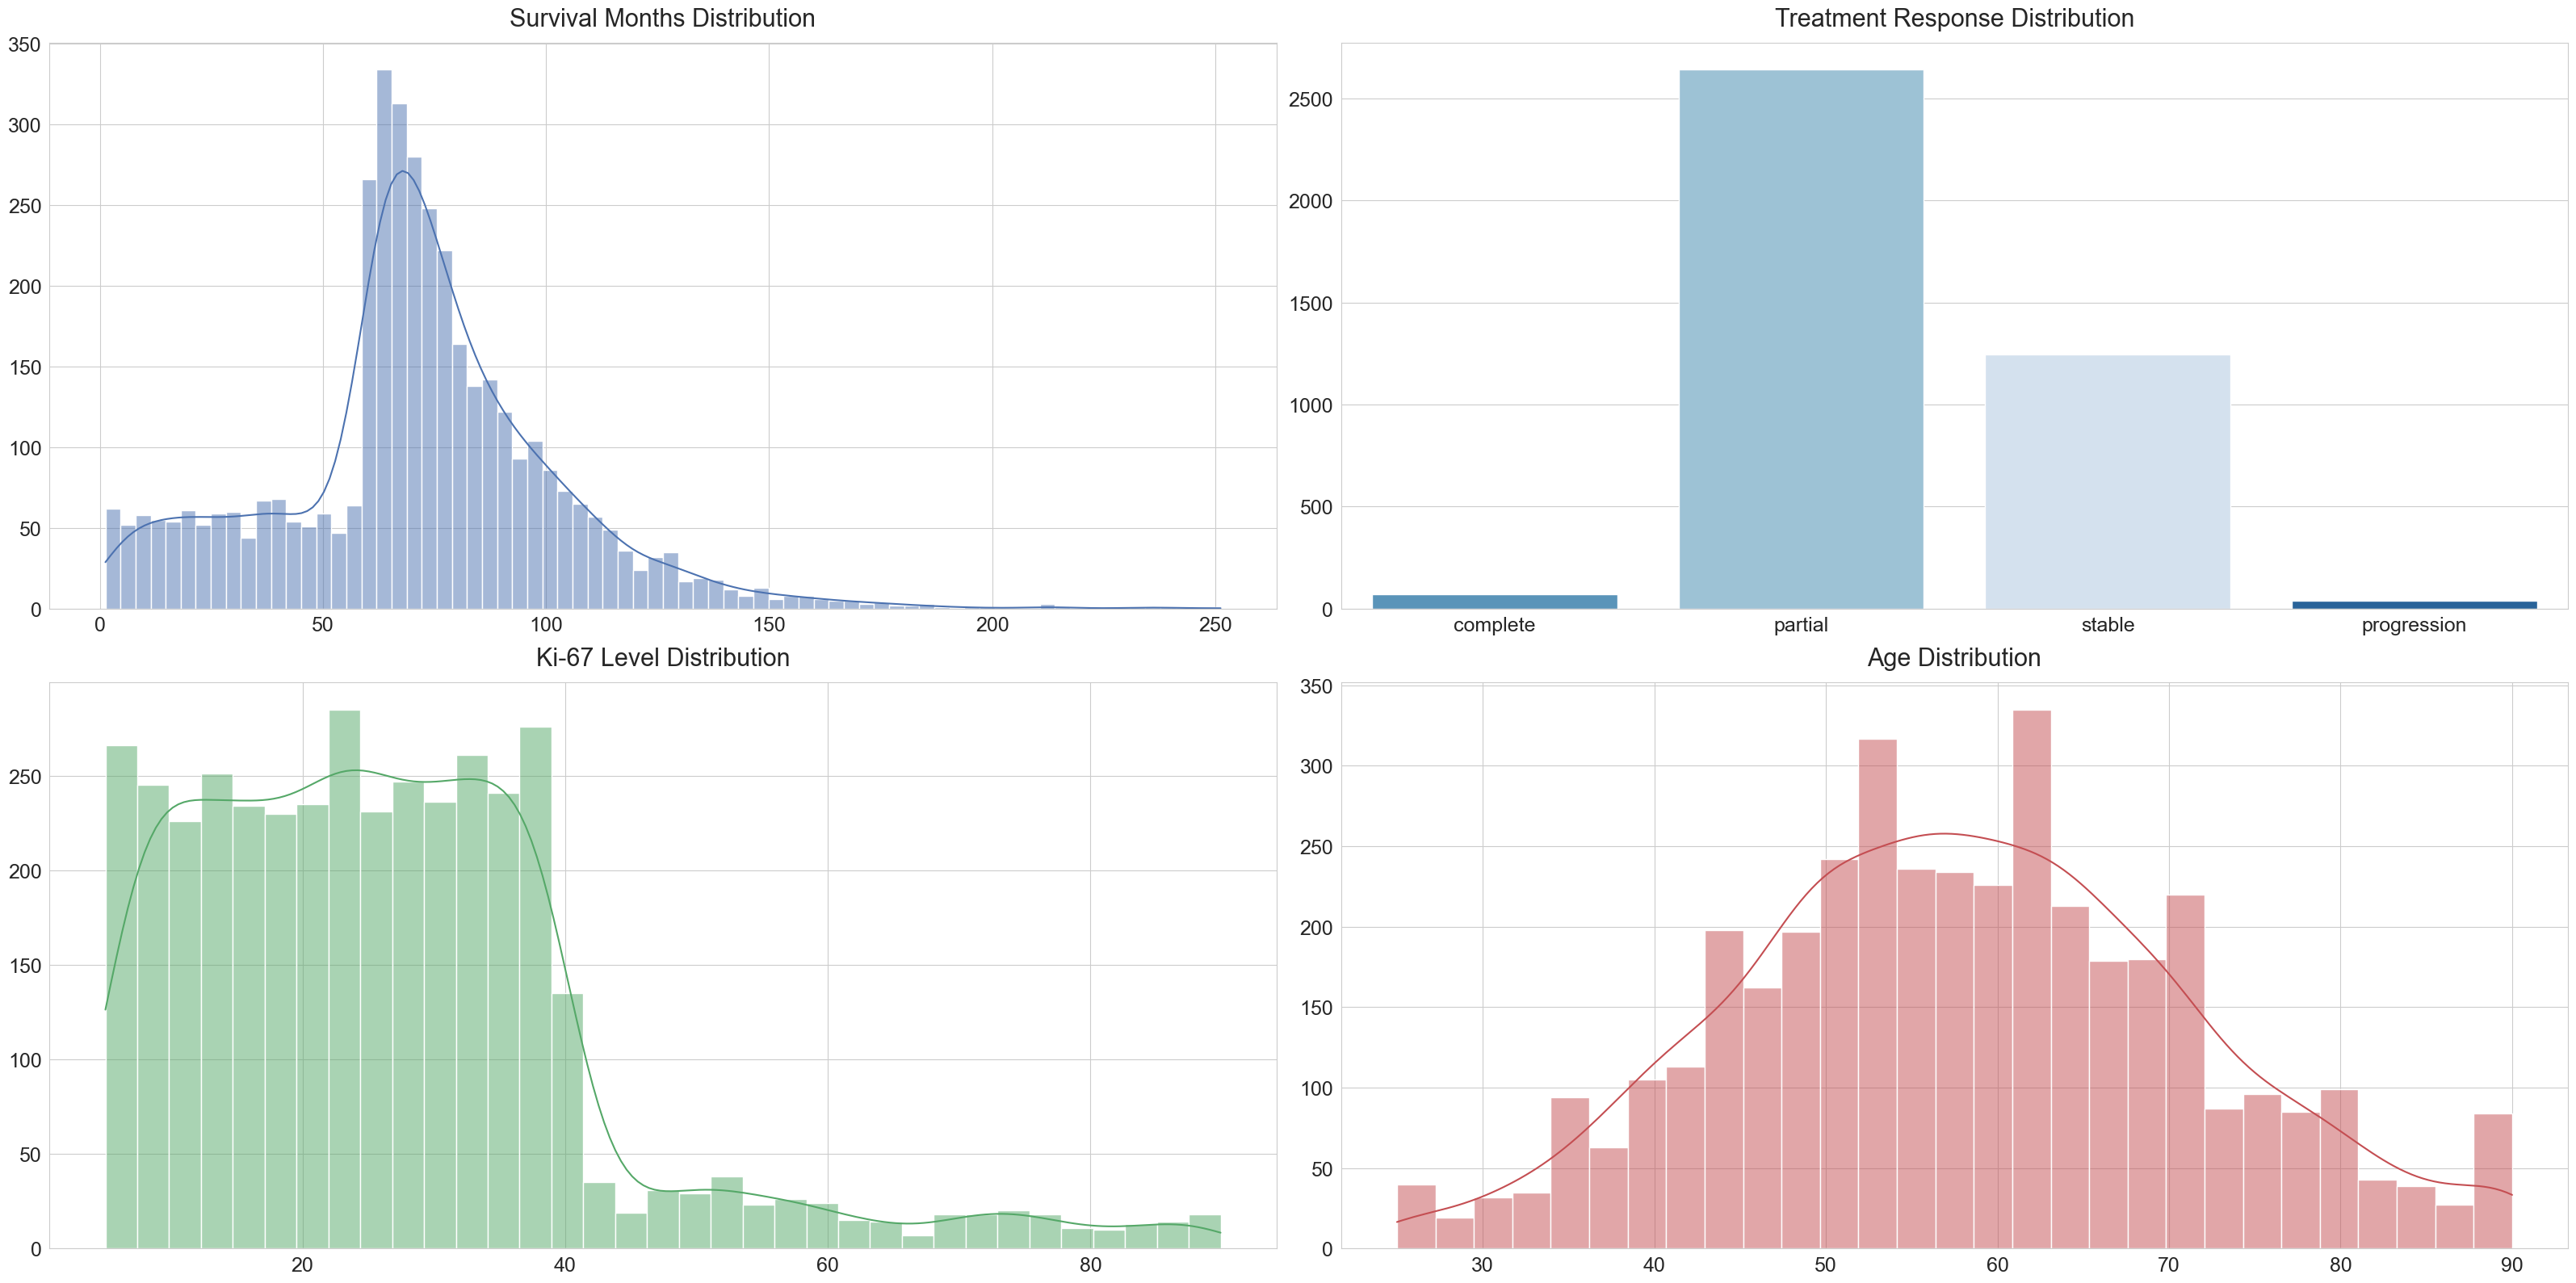

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

fig, axes = plt.subplots(figsize=(32, 16), ncols=2, nrows=2)

sns.histplot(
    df_combined["survival_months"],
    kde=True,
    ax=axes[0][0],
    color="#4c72b0"
)

sns.countplot(
    data=df_combined,
    x="treatment_response",
    hue="treatment_response",
    dodge=False,
    ax=axes[0][1],
    order=["complete", "partial", "stable", "progression"],
    palette="Blues",
    legend=False
)

sns.histplot(
    df_combined["ki67_level"],
    kde=True,
    ax=axes[1][0],
    color="#55a868"
)

sns.histplot(
    df_combined["age"],
    kde=True,
    ax=axes[1][1],
    color="#c44e52"
)

for i in range(2):
    for j in range(2):
        axes[i][j].tick_params(axis="x", labelsize=18)
        axes[i][j].tick_params(axis="y", labelsize=18)
        axes[i][j].set_xlabel("")
        axes[i][j].set_ylabel("")

if axes[0][1].legend_:
    axes[0][1].legend_.remove()

axes[0][0].set_title("Survival Months Distribution", size=22, pad=15)
axes[0][1].set_title("Treatment Response Distribution", size=22, pad=15)
axes[1][0].set_title("Ki-67 Level Distribution", size=22, pad=15)
axes[1][1].set_title("Age Distribution", size=22, pad=15)

plt.tight_layout()
plt.show()


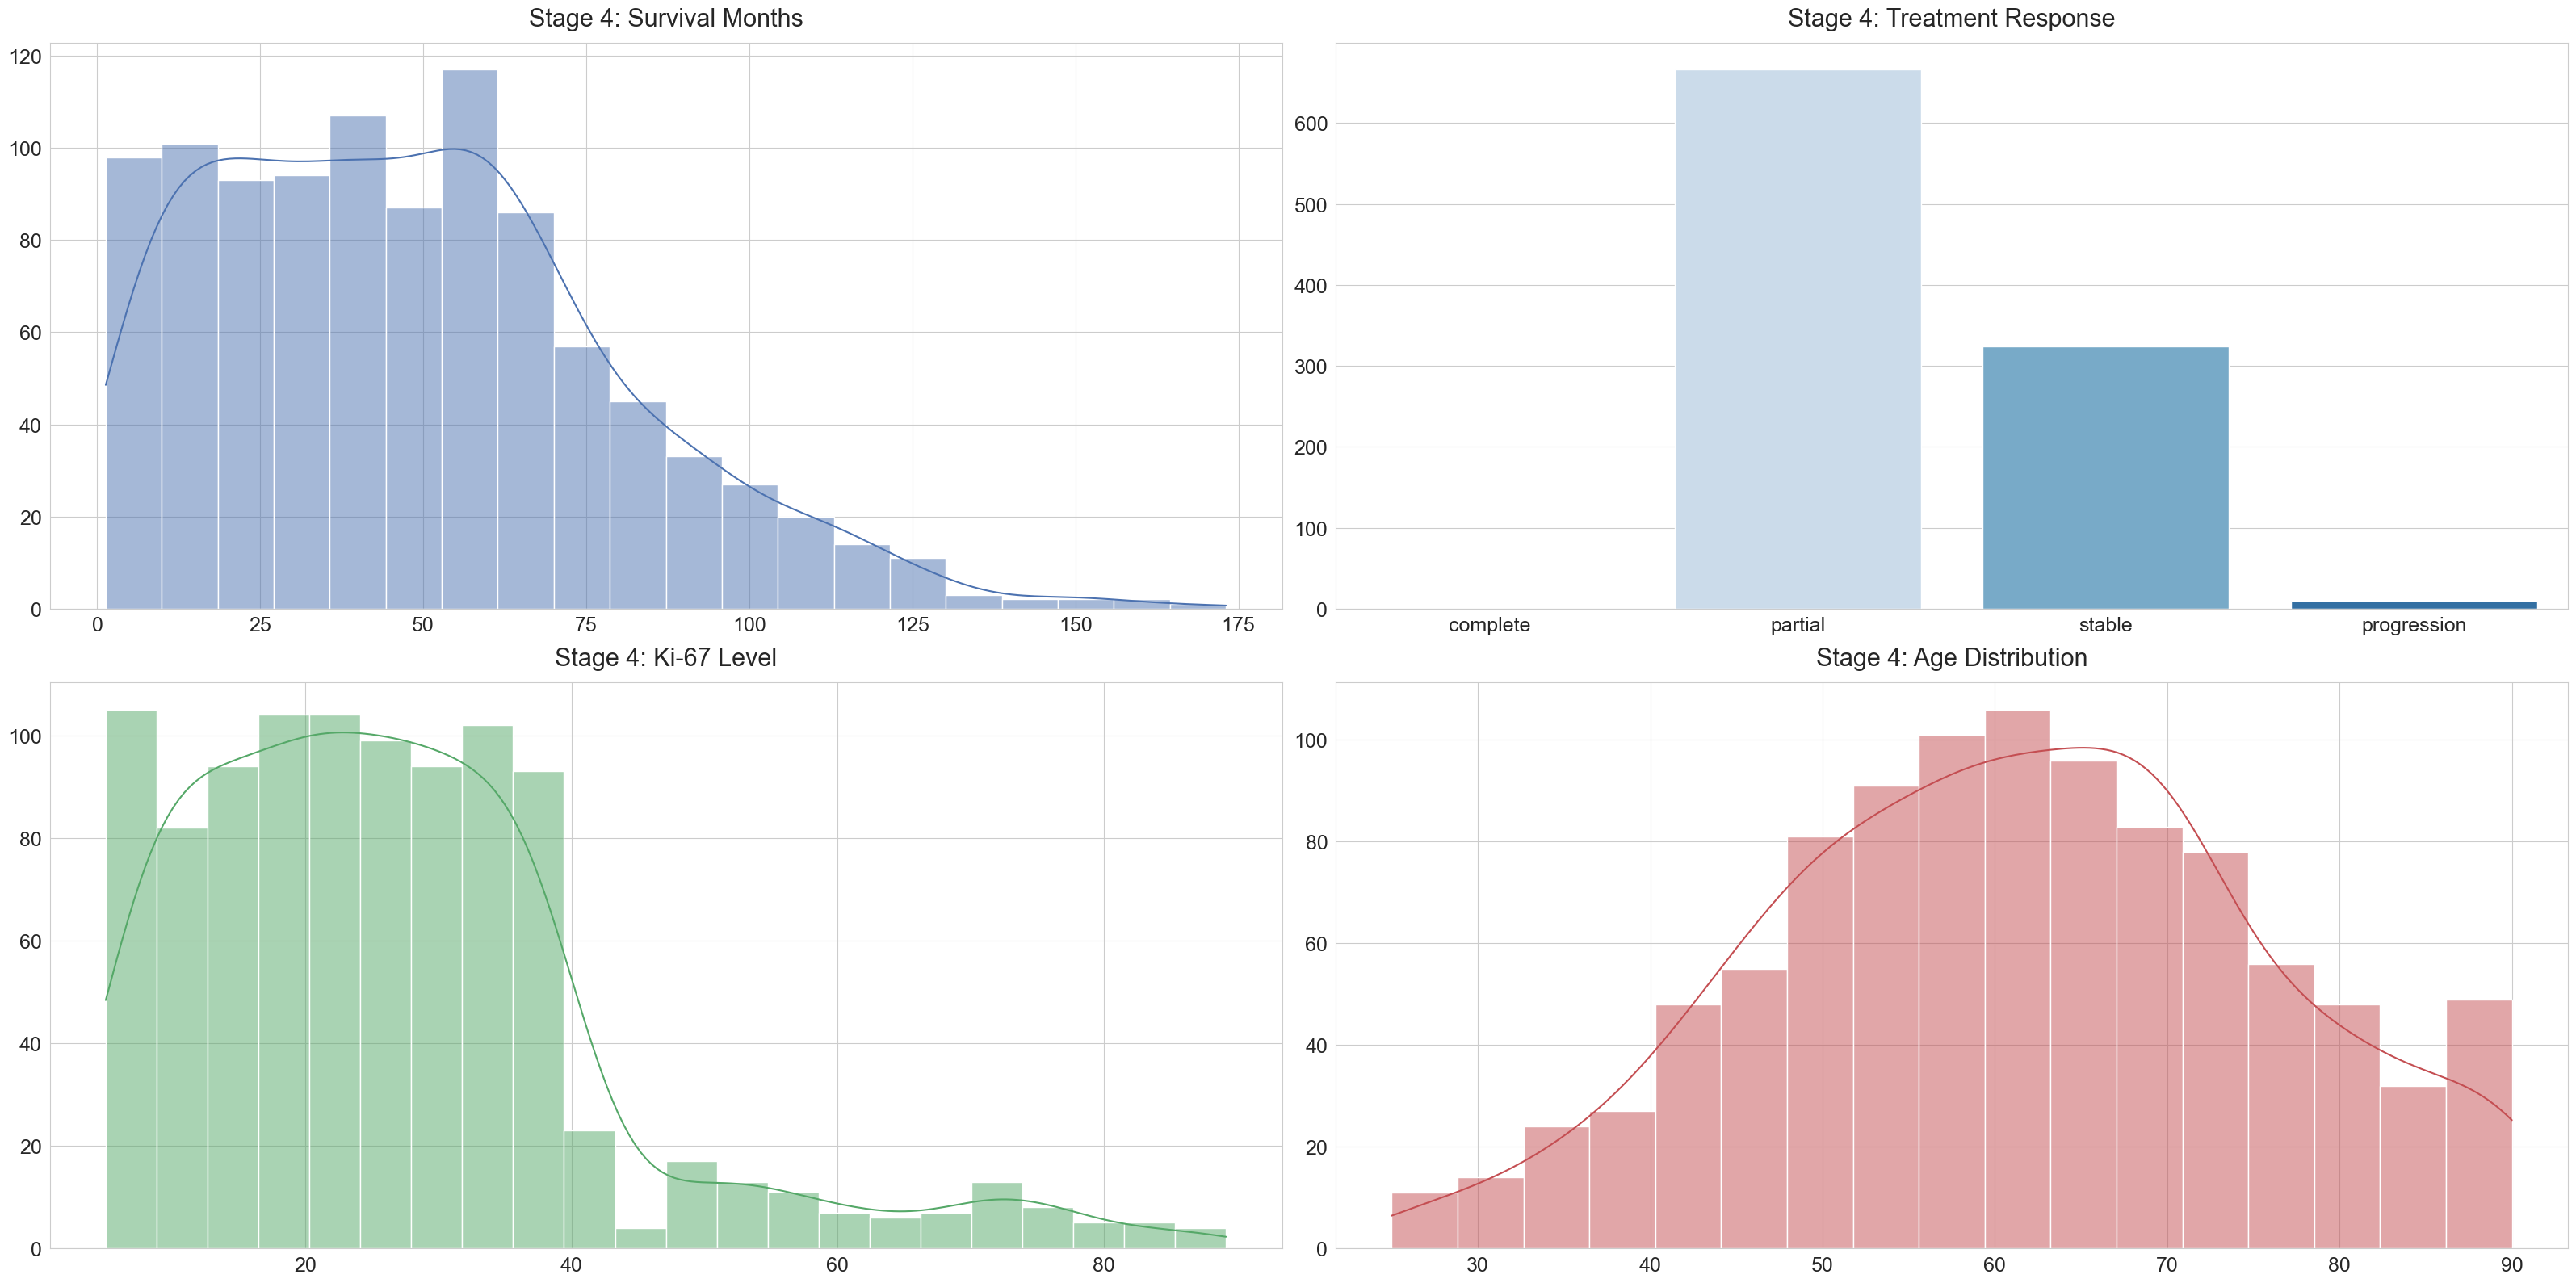

In [91]:
stage4_df = df_combined[df_combined["stage"] == 4].copy()

fig, axes = plt.subplots(figsize=(32, 16), ncols=2, nrows=2)

sns.histplot(
    stage4_df["survival_months"],
    kde=True,
    ax=axes[0][0],
    color="#4c72b0"
)

sns.countplot(
    data=stage4_df,
    x="treatment_response",
    hue="treatment_response",
    dodge=False,
    ax=axes[0][1],
    order=["complete", "partial", "stable", "progression"],
    palette="Blues",
    legend=False
)

sns.histplot(
    stage4_df["ki67_level"],
    kde=True,
    ax=axes[1][0],
    color="#55a868"
)

sns.histplot(
    stage4_df["age"],
    kde=True,
    ax=axes[1][1],
    color="#c44e52"
)

for i in range(2):
    for j in range(2):
        axes[i][j].tick_params(axis="x", labelsize=18)
        axes[i][j].tick_params(axis="y", labelsize=18)
        axes[i][j].set_xlabel("")
        axes[i][j].set_ylabel("")

axes[0][0].set_title("Stage 4: Survival Months", size=22, pad=15)
axes[0][1].set_title("Stage 4: Treatment Response", size=22, pad=15)
axes[1][0].set_title("Stage 4: Ki-67 Level", size=22, pad=15)
axes[1][1].set_title("Stage 4: Age Distribution", size=22, pad=15)

plt.tight_layout()
plt.show()


In [92]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [93]:
# смотрим на количество метастазов по стадиям. Очень странно почему на 1-2 стадии есть метастазы
metastasis_by_stage = (
    df_combined.groupby("stage")["metastasis_sites"].value_counts().unstack(fill_value=0)
)
metastasis_by_stage

metastasis_sites,bone,"bone, brain","bone, brain, liver","bone, brain, lung","bone, distant_lymph_nodes","bone, distant_lymph_nodes, liver","bone, distant_lymph_nodes, lung","bone, liver","bone, liver, brain","bone, liver, distant_lymph_nodes","bone, liver, lung","bone, lung","bone, lung, brain","bone, lung, distant_lymph_nodes","bone, lung, liver",brain,"brain, bone","brain, bone, liver","brain, bone, lung","brain, distant_lymph_nodes","brain, liver","brain, liver, bone","brain, lung","brain, lung, liver",distant_lymph_nodes,"distant_lymph_nodes, bone","distant_lymph_nodes, brain","distant_lymph_nodes, brain, liver","distant_lymph_nodes, liver","distant_lymph_nodes, lung",liver,"liver, bone","liver, bone, brain","liver, bone, distant_lymph_nodes","liver, bone, lung","liver, brain","liver, distant_lymph_nodes","liver, distant_lymph_nodes, bone","liver, distant_lymph_nodes, brain","liver, lung","liver, lung, bone","liver, lung, brain","liver, lung, distant_lymph_nodes",lung,"lung, bone","lung, bone, brain","lung, bone, distant_lymph_nodes","lung, bone, liver","lung, brain","lung, brain, bone","lung, distant_lymph_nodes","lung, distant_lymph_nodes, brain","lung, liver","lung, liver, bone","lung, liver, brain",none
stage,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,989
2,53,5,0,0,1,0,1,7,0,0,0,11,1,0,1,7,0,0,0,0,0,0,0,0,3,2,0,0,1,0,19,4,0,0,1,1,0,0,0,0,0,0,0,21,2,0,0,1,1,1,0,0,2,0,0,854
3,151,11,1,1,6,1,0,25,2,2,4,20,0,0,3,34,10,2,1,0,1,1,2,1,19,4,1,0,4,0,62,17,0,1,4,1,0,0,1,4,2,0,0,61,7,2,2,1,2,0,1,1,4,0,1,519
4,339,31,2,2,17,2,3,48,2,2,8,46,3,1,4,65,16,1,0,3,6,1,4,0,31,8,1,1,4,3,154,27,3,1,2,5,1,1,0,12,1,1,1,100,18,0,1,1,5,2,1,0,7,2,0,0


#### 2. Предобработка

Возможно нужно закинуть в четвертую стадию все строки с 1-2 стадии, в которых есть метастазы. Но возможно датасеты заполняются не сразу, а в течение всего периода наблюдения за пациентом. Допустим, пациент поступил к нам со второй стадией и до моменты смерти у него рак дошел до 4 стадии с метастазами, поэтому в датасете есть метастазы, но столбец stage отвечает именно за стадию на момент начала терапии.

##### Добавим отдельные столбцы для всех локализаций метастазов, добавим TNBC столбец, удалим ненужные столбцы

In [94]:
from sklearn.preprocessing import MultiLabelBinarizer

def split_sites(s):
    """Разбиваем список метастазов на отдельные локализации."""
    # Если значения нет или явно указано 'none', возвращаем пустой список (метастазов нет)
    if pd.isna(s):
        return []
    # Если указано "none", возвращаем список с одним элементом "none"
    if s.lower() == "none":
        return ["none"]
    # Иначе делим строку по запятым и убираем пробелы вокруг названий органов
    return [site.strip() for site in s.split(",")]

# Применяем функцию к каждому пациенту: получаем список органов вместо строки
# [[], ['bone'], ['bone', 'lung'], ['bone', 'lung', 'brain'], ['bone', 'lung', 'brain', 'liver']...]
sites_series = df_combined["metastasis_sites"].apply(split_sites)

# MultiLabelBinarizer превращает список категорий в one-hot представление
mlb = MultiLabelBinarizer()
metastasis_ohe = pd.DataFrame(
    mlb.fit_transform(sites_series),  # матрица 0/1 для каждого органа
    columns=[f"met_{col}" for col in mlb.classes_],  # осмысленные имена столбцов
    index=df_combined.index  # сохраняем первоначальные индексы пациентов
)

metastasis_ohe.head()

,met_bone,met_brain,met_distant_lymph_nodes,met_liver,met_lung,met_none
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [95]:
metastasis_ohe.sum()

met_bone                    970
met_brain                   251
met_distant_lymph_nodes     133
met_liver                   485
met_lung                    397
met_none                   2362
dtype: int64

In [96]:
df_combined.head()

,patient_id,stage,age,gender,menopausal_status,family_history,molecular_subtype,er_status,pr_status,her2_status,brca_mutation,ki67_level,treatment,surgery_type,tumor_size_before,tumor_size_3m,tumor_size_6m,tumor_size_12m,tumor_size_24m,has_metastasis,metastasis_sites,survival_months,performance_status,tumor_grade,lymph_node_status,positive_lymph_nodes,treatment_response
0,BC_1_0001,1,59,Ж,postmenopausal,False,HR+HER2-,True,True,False,False,15.8,surgery_only,mastectomy,1.4,1.2,1.1,1.1,1.1,False,none,98.0,0,1,negative,0,stable
1,BC_1_0002,1,46,Ж,premenopausal,True,TNBC,False,False,False,False,86.2,surgery_only,lumpectomy,1.2,0.9,0.8,0.9,0.9,False,none,61.8,0,2,negative,0,stable
2,BC_1_0003,1,60,Ж,postmenopausal,False,TNBC,False,False,False,False,73.0,surgery_only,lumpectomy,1.5,1.2,1.1,1.1,1.1,False,none,112.9,2,2,negative,0,stable
3,BC_1_0004,1,56,Ж,postmenopausal,False,HR+HER2-,True,False,False,False,11.8,surgery_only,lumpectomy,1.1,1.0,0.9,0.9,0.9,False,none,65.5,0,2,negative,0,stable
4,BC_1_0005,1,41,Ж,perimenopausal,False,HR-HER2+,False,False,True,False,35.5,surgery_only,lumpectomy,1.7,1.5,1.4,1.3,1.4,False,none,36.9,1,2,negative,0,stable


In [97]:
df_combined = pd.concat([df_combined, metastasis_ohe], axis=1)
df_combined.head()

,patient_id,stage,age,gender,menopausal_status,family_history,molecular_subtype,er_status,pr_status,her2_status,brca_mutation,ki67_level,treatment,surgery_type,tumor_size_before,tumor_size_3m,tumor_size_6m,tumor_size_12m,tumor_size_24m,has_metastasis,metastasis_sites,survival_months,performance_status,tumor_grade,lymph_node_status,positive_lymph_nodes,treatment_response,met_bone,met_brain,met_distant_lymph_nodes,met_liver,met_lung,met_none
0,BC_1_0001,1,59,Ж,postmenopausal,False,HR+HER2-,True,True,False,False,15.8,surgery_only,mastectomy,1.4,1.2,1.1,1.1,1.1,False,none,98.0,0,1,negative,0,stable,0,0,0,0,0,1
1,BC_1_0002,1,46,Ж,premenopausal,True,TNBC,False,False,False,False,86.2,surgery_only,lumpectomy,1.2,0.9,0.8,0.9,0.9,False,none,61.8,0,2,negative,0,stable,0,0,0,0,0,1
2,BC_1_0003,1,60,Ж,postmenopausal,False,TNBC,False,False,False,False,73.0,surgery_only,lumpectomy,1.5,1.2,1.1,1.1,1.1,False,none,112.9,2,2,negative,0,stable,0,0,0,0,0,1
3,BC_1_0004,1,56,Ж,postmenopausal,False,HR+HER2-,True,False,False,False,11.8,surgery_only,lumpectomy,1.1,1.0,0.9,0.9,0.9,False,none,65.5,0,2,negative,0,stable,0,0,0,0,0,1
4,BC_1_0005,1,41,Ж,perimenopausal,False,HR-HER2+,False,False,True,False,35.5,surgery_only,lumpectomy,1.7,1.5,1.4,1.3,1.4,False,none,36.9,1,2,negative,0,stable,0,0,0,0,0,1


In [98]:
# удалим столбец metastasis_sites, тк мы его разделили
df_combined = df_combined.drop(columns=["metastasis_sites"])

In [99]:
# дропаем столбец lymph_node_status, тк он дублируется
df_combined = df_combined.drop(columns=["lymph_node_status"])

In [100]:
# дропаем treatment_response, тк мы не знаем ответ для на лечение для нового пациента
df_combined = df_combined.drop(columns=["treatment_response"])

In [ ]:
df_combined['menopausal_status'] = (df_combined['menopausal_status'] == 'postmenopausal')

In [102]:
df_combined.head()

,patient_id,stage,age,gender,menopausal_status,family_history,molecular_subtype,er_status,pr_status,her2_status,brca_mutation,ki67_level,treatment,surgery_type,tumor_size_before,tumor_size_3m,tumor_size_6m,tumor_size_12m,tumor_size_24m,has_metastasis,survival_months,performance_status,tumor_grade,positive_lymph_nodes,met_bone,met_brain,met_distant_lymph_nodes,met_liver,met_lung,met_none
0,BC_1_0001,1,59,Ж,True,False,HR+HER2-,True,True,False,False,15.8,surgery_only,mastectomy,1.4,1.2,1.1,1.1,1.1,False,98.0,0,1,0,0,0,0,0,0,1
1,BC_1_0002,1,46,Ж,False,True,TNBC,False,False,False,False,86.2,surgery_only,lumpectomy,1.2,0.9,0.8,0.9,0.9,False,61.8,0,2,0,0,0,0,0,0,1
2,BC_1_0003,1,60,Ж,True,False,TNBC,False,False,False,False,73.0,surgery_only,lumpectomy,1.5,1.2,1.1,1.1,1.1,False,112.9,2,2,0,0,0,0,0,0,1
3,BC_1_0004,1,56,Ж,True,False,HR+HER2-,True,False,False,False,11.8,surgery_only,lumpectomy,1.1,1.0,0.9,0.9,0.9,False,65.5,0,2,0,0,0,0,0,0,1
4,BC_1_0005,1,41,Ж,False,False,HR-HER2+,False,False,True,False,35.5,surgery_only,lumpectomy,1.7,1.5,1.4,1.3,1.4,False,36.9,1,2,0,0,0,0,0,0,1


In [103]:
# создадим столбец с TNBC
df_combined["tnbc"] = df_combined["molecular_subtype"].str.contains("TNBC", na=False).astype(int)
# удалим столбец с molecular_subtype, т.к. инфа о HR+, HER2, ER уже есть в других столбцах
df_combined = df_combined.drop(columns=["molecular_subtype"])
df_combined.head()


,patient_id,stage,age,gender,menopausal_status,family_history,er_status,pr_status,her2_status,brca_mutation,ki67_level,treatment,surgery_type,tumor_size_before,tumor_size_3m,tumor_size_6m,tumor_size_12m,tumor_size_24m,has_metastasis,survival_months,performance_status,tumor_grade,positive_lymph_nodes,met_bone,met_brain,met_distant_lymph_nodes,met_liver,met_lung,met_none,tnbc
0,BC_1_0001,1,59,Ж,True,False,True,True,False,False,15.8,surgery_only,mastectomy,1.4,1.2,1.1,1.1,1.1,False,98.0,0,1,0,0,0,0,0,0,1,0
1,BC_1_0002,1,46,Ж,False,True,False,False,False,False,86.2,surgery_only,lumpectomy,1.2,0.9,0.8,0.9,0.9,False,61.8,0,2,0,0,0,0,0,0,1,1
2,BC_1_0003,1,60,Ж,True,False,False,False,False,False,73.0,surgery_only,lumpectomy,1.5,1.2,1.1,1.1,1.1,False,112.9,2,2,0,0,0,0,0,0,1,1
3,BC_1_0004,1,56,Ж,True,False,True,False,False,False,11.8,surgery_only,lumpectomy,1.1,1.0,0.9,0.9,0.9,False,65.5,0,2,0,0,0,0,0,0,1,0
4,BC_1_0005,1,41,Ж,False,False,False,False,True,False,35.5,surgery_only,lumpectomy,1.7,1.5,1.4,1.3,1.4,False,36.9,1,2,0,0,0,0,0,0,1,0


In [104]:
# удалим patient_id, gender 
df_combined = df_combined.drop(columns=["gender", "patient_id", "tumor_size_3m", "tumor_size_6m", "tumor_size_12m", "tumor_size_24m", "surgery_type"])

In [105]:
df_combined.head()


,stage,age,menopausal_status,family_history,er_status,pr_status,her2_status,brca_mutation,ki67_level,treatment,tumor_size_before,has_metastasis,survival_months,performance_status,tumor_grade,positive_lymph_nodes,met_bone,met_brain,met_distant_lymph_nodes,met_liver,met_lung,met_none,tnbc
0,1,59,True,False,True,True,False,False,15.8,surgery_only,1.4,False,98.0,0,1,0,0,0,0,0,0,1,0
1,1,46,False,True,False,False,False,False,86.2,surgery_only,1.2,False,61.8,0,2,0,0,0,0,0,0,1,1
2,1,60,True,False,False,False,False,False,73.0,surgery_only,1.5,False,112.9,2,2,0,0,0,0,0,0,1,1
3,1,56,True,False,True,False,False,False,11.8,surgery_only,1.1,False,65.5,0,2,0,0,0,0,0,0,1,0
4,1,41,False,False,False,False,True,False,35.5,surgery_only,1.7,False,36.9,1,2,0,0,0,0,0,0,1,0


##### Label Encoder

In [106]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

df_labeled = df_combined.copy()

# выбираем все столбцы типа object (например, 'menopausal_status', 'treatment')
object_cols_combined = df_labeled.select_dtypes(include=["object"]).columns.tolist()
print("Object columns in df_combined:", object_cols_combined)

combined_label_encoders = {}
for col in object_cols_combined:
    le = LabelEncoder()
    filled = df_labeled[col].fillna("Unknown")
    encoded = le.fit_transform(filled)
    df_labeled[col] = encoded.astype(np.uint8)
    combined_label_encoders[col] = le


Object columns in df_combined: ['treatment']


In [107]:
df_labeled.head()

,stage,age,menopausal_status,family_history,er_status,pr_status,her2_status,brca_mutation,ki67_level,treatment,tumor_size_before,has_metastasis,survival_months,performance_status,tumor_grade,positive_lymph_nodes,met_bone,met_brain,met_distant_lymph_nodes,met_liver,met_lung,met_none,tnbc
0,1,59,True,False,True,True,False,False,15.8,2,1.4,False,98.0,0,1,0,0,0,0,0,0,1,0
1,1,46,False,True,False,False,False,False,86.2,2,1.2,False,61.8,0,2,0,0,0,0,0,0,1,1
2,1,60,True,False,False,False,False,False,73.0,2,1.5,False,112.9,2,2,0,0,0,0,0,0,1,1
3,1,56,True,False,True,False,False,False,11.8,2,1.1,False,65.5,0,2,0,0,0,0,0,0,1,0
4,1,41,False,False,False,False,True,False,35.5,2,1.7,False,36.9,1,2,0,0,0,0,0,0,1,0


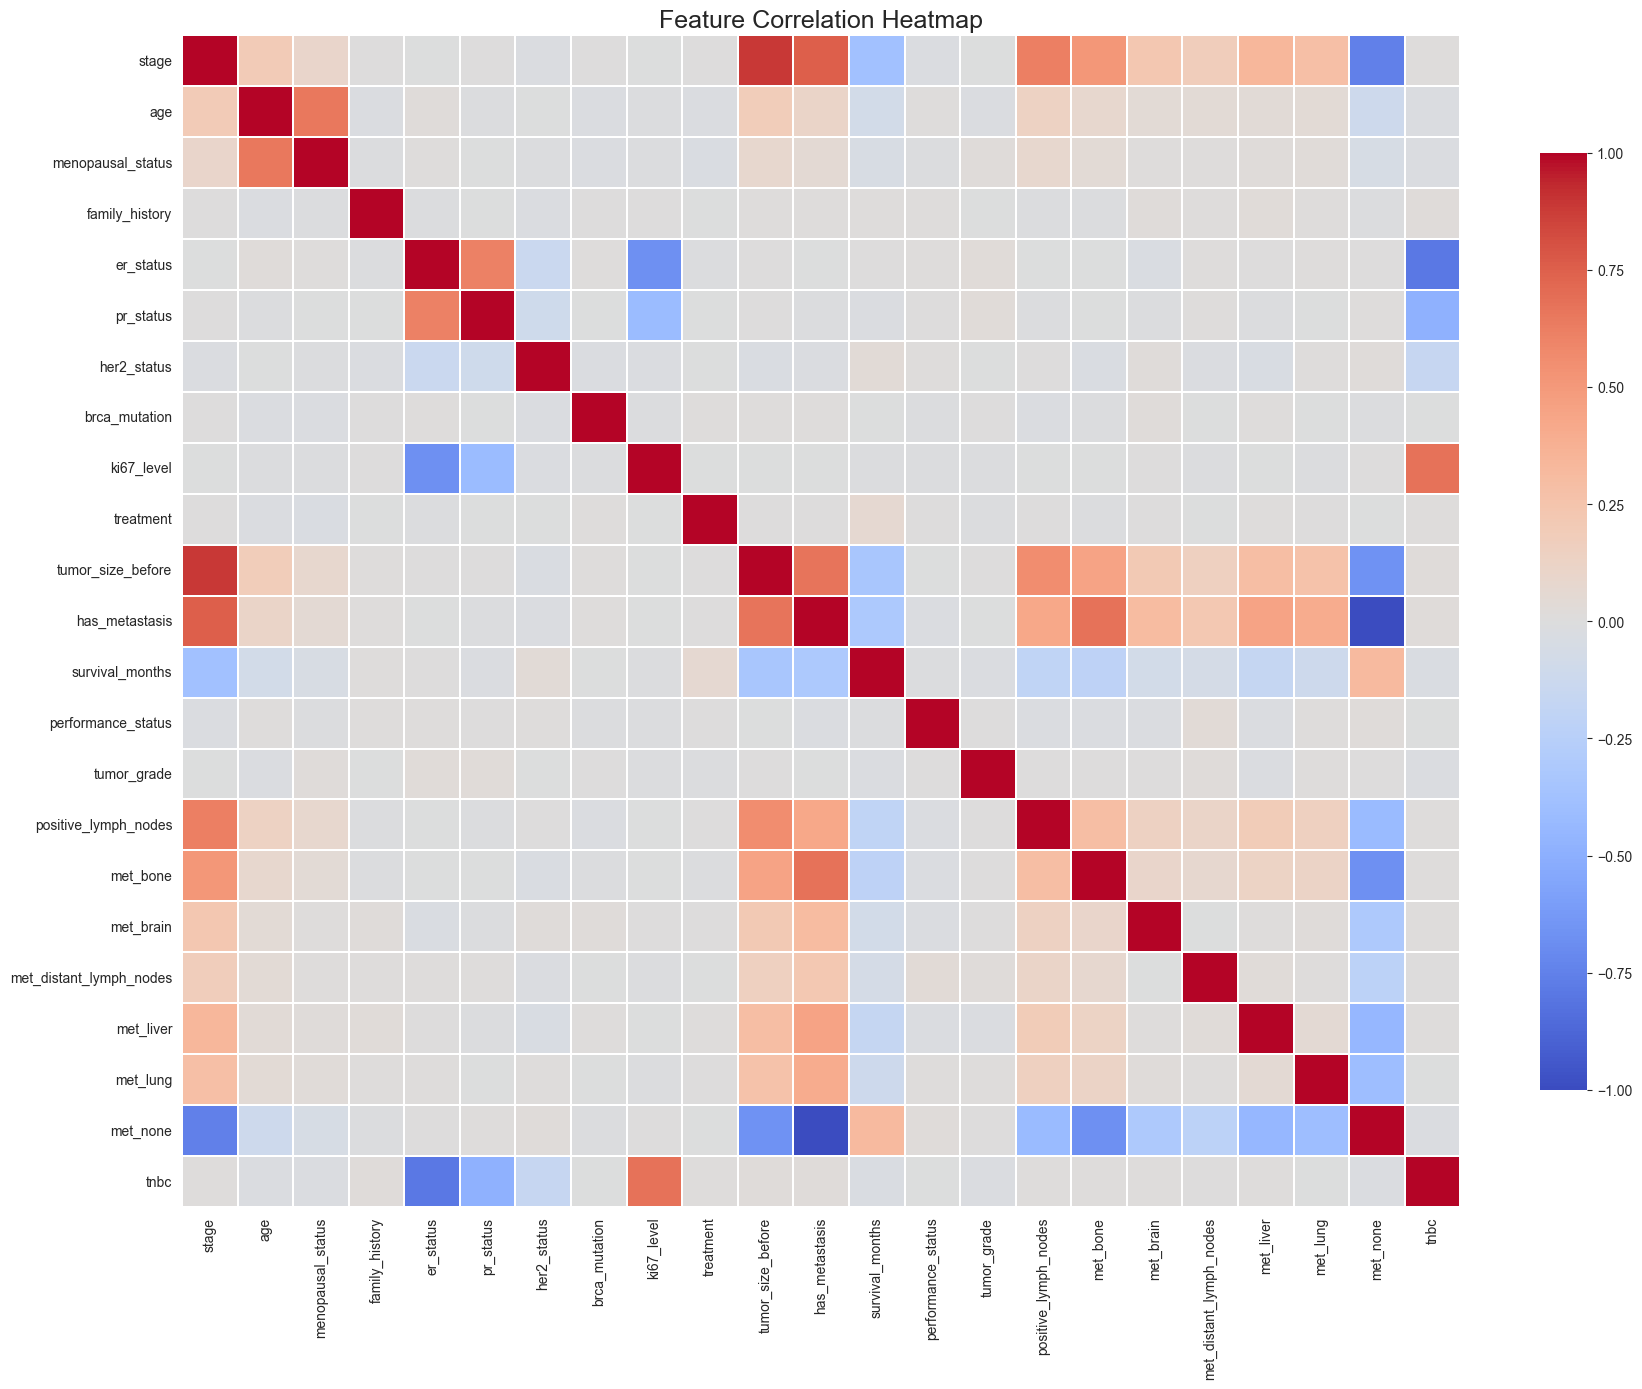

In [109]:
numeric_df = df_labeled.copy()
bool_cols = numeric_df.select_dtypes(include=["bool"]).columns
numeric_df[bool_cols] = numeric_df[bool_cols].astype(int)

corr_matrix = numeric_df.corr()

plt.figure(figsize=(18, 14))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    square=False,
    annot=False,
    linewidths=0.3,
    cbar_kws={"shrink": 0.8}
)
plt.title("Feature Correlation Heatmap", fontsize=18)
plt.tight_layout()
plt.show()


### 🔍 Типы данных в numeric_df


In [110]:
print("="*120)
print("📊 ТИПЫ ДАННЫХ В numeric_df")
print("="*120)
print()

# Создаем сводную таблицу с типами данных
dtype_summary = pd.DataFrame({
    'Столбец': numeric_df.columns,
    'Тип данных': numeric_df.dtypes.values,
    'Не-null значений': [numeric_df[col].notna().sum() for col in numeric_df.columns],
    'Null значений': [numeric_df[col].isna().sum() for col in numeric_df.columns],
    'Уникальных': [numeric_df[col].nunique() for col in numeric_df.columns],
    'Min': [numeric_df[col].min() if pd.api.types.is_numeric_dtype(numeric_df[col]) else '-' for col in numeric_df.columns],
    'Max': [numeric_df[col].max() if pd.api.types.is_numeric_dtype(numeric_df[col]) else '-' for col in numeric_df.columns]
})

# Группируем по типам данных
print("\n📋 СВОДКА ПО ТИПАМ ДАННЫХ:")
print("-"*120)
for dtype in dtype_summary['Тип данных'].unique():
    count = (dtype_summary['Тип данных'] == dtype).sum()
    print(f"  {str(dtype):15s} → {count:3d} столбцов")

print("\n" + "="*120)
print("📝 ДЕТАЛЬНАЯ ИНФОРМАЦИЯ ПО СТОЛБЦАМ:")
print("="*120)

# Выводим информацию о каждом столбце
for idx, row in dtype_summary.iterrows():
    dtype_str = str(row['Тип данных'])
    
    # Определяем категорию
    if 'int' in dtype_str:
        icon = "🔢"
        category = "INTEGER"
    elif 'float' in dtype_str:
        icon = "📈"
        category = "FLOAT"
    elif 'uint' in dtype_str:
        icon = "🔵"
        category = "UNSIGNED INT"
    elif 'object' in dtype_str:
        icon = "📝"
        category = "STRING/OBJECT"
    elif 'bool' in dtype_str:
        icon = "✓"
        category = "BOOLEAN"
    else:
        icon = "❓"
        category = "OTHER"
    
    print(f"{icon} [{category:15s}] {row['Столбец']:30s} → {dtype_str:10s} | "
          f"Уникальных: {row['Уникальных']:4d} | Null: {row['Null значений']:4d} | "
          f"Min: {str(row['Min']):10s} | Max: {str(row['Max']):10s}")

print("="*120)

# Проверяем наличие нечисловых столбцов
non_numeric = dtype_summary[~dtype_summary['Тип данных'].astype(str).str.contains('int|float|uint')]
if len(non_numeric) > 0:
    print("\n⚠️  ВНИМАНИЕ: Обнаружены НЕЧИСЛОВЫЕ столбцы!")
    print("-"*120)
    for idx, row in non_numeric.iterrows():
        print(f"  ❌ {row['Столбец']:30s} → {row['Тип данных']}")
    print("\n💡 Эти столбцы НЕ МОГУТ использоваться в .corr() без предварительного кодирования!")
    print("="*120)
else:
    print("\n✅ Все столбцы числовые - можно использовать .corr()")
    print("="*120)


📊 ТИПЫ ДАННЫХ В numeric_df


📋 СВОДКА ПО ТИПАМ ДАННЫХ:
------------------------------------------------------------------------------------------------------------------------
  int64           →  19 столбцов
  float64         →   3 столбцов
  uint8           →   1 столбцов

📝 ДЕТАЛЬНАЯ ИНФОРМАЦИЯ ПО СТОЛБЦАМ:
🔢 [INTEGER        ] stage                          → int64      | Уникальных:    4 | Null:    0 | Min: 1          | Max: 4         
🔢 [INTEGER        ] age                            → int64      | Уникальных:   66 | Null:    0 | Min: 25         | Max: 90        
🔢 [INTEGER        ] menopausal_status              → int64      | Уникальных:    2 | Null:    0 | Min: 0          | Max: 1         
🔢 [INTEGER        ] family_history                 → int64      | Уникальных:    2 | Null:    0 | Min: 0          | Max: 1         
🔢 [INTEGER        ] er_status                      → int64      | Уникальных:    2 | Null:    0 | Min: 0          | Max: 1         
🔢 [INTEGER        ] pr_statu

In [ ]:
# Удалим столбцы tumor_size_3m, tumor_size_6m, tumor_size_12m, tumor_size_24m из numeric_df
numeric_df = numeric_df.drop(columns=['tumor_size_3m', 'tumor_size_6m', 'tumor_size_12m', 'tumor_size_24m'])

In [40]:
# Разделение numeric_df по стадиям
numeric_df_by_stage = {}

for stage in [1, 2, 3, 4]:
    numeric_df_by_stage[f'stage_{stage}'] = numeric_df[numeric_df['stage'] == stage].copy()
    print(f"Stage {stage}: {len(numeric_df_by_stage[f'stage_{stage}'])} строк")

# Альтернативно, можно создать отдельные переменные:
numeric_df_stage1 = numeric_df[numeric_df['stage'] == 1].copy()
numeric_df_stage2 = numeric_df[numeric_df['stage'] == 2].copy()
numeric_df_stage3 = numeric_df[numeric_df['stage'] == 3].copy()
numeric_df_stage4 = numeric_df[numeric_df['stage'] == 4].copy()

print(f"\nПроверка размеров:")
print(f"Stage 1: {len(numeric_df_stage1)} строк, {numeric_df_stage1.shape[1]} столбцов")
print(f"Stage 2: {len(numeric_df_stage2)} строк, {numeric_df_stage2.shape[1]} столбцов")
print(f"Stage 3: {len(numeric_df_stage3)} строк, {numeric_df_stage3.shape[1]} столбцов")
print(f"Stage 4: {len(numeric_df_stage4)} строк, {numeric_df_stage4.shape[1]} столбцов")


Stage 1: 1000 строк
Stage 2: 1000 строк
Stage 3: 1000 строк
Stage 4: 1000 строк

Проверка размеров:
Stage 1: 1000 строк, 26 столбцов
Stage 2: 1000 строк, 26 столбцов
Stage 3: 1000 строк, 26 столбцов
Stage 4: 1000 строк, 26 столбцов


### 3. Построение модели (плохо работает)

##### Baseline модели
Отрабатывают не очень. val_mae': 21.59811225

In [111]:
# 1. Разделение признаков и целевой переменной
y = df_labeled["survival_months"].copy()
X = df_labeled.drop(columns=["survival_months"])

# 2. Train/validation split
y_stage = df_labeled["stage"]  # для стратификации
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y_stage,
)

# 3. Подготовка данных для PyTorch
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader

X_train_num = X_train.copy()
X_valid_num = X_valid.copy()

bool_cols = X_train_num.select_dtypes(include=["bool"]).columns
X_train_num[bool_cols] = X_train_num[bool_cols].astype(np.uint8)
X_valid_num[bool_cols] = X_valid_num[bool_cols].astype(np.uint8)

X_train_t = torch.tensor(X_train_num.to_numpy(dtype=np.float32))
X_valid_t = torch.tensor(X_valid_num.to_numpy(dtype=np.float32))
y_train_t = torch.tensor(y_train.to_numpy(dtype=np.float32)).unsqueeze(1)
y_valid_t = torch.tensor(y_valid.to_numpy(dtype=np.float32)).unsqueeze(1)

train_ds = TensorDataset(X_train_t, y_train_t)
valid_ds = TensorDataset(X_valid_t, y_valid_t)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_ds, batch_size=256, shuffle=False)


In [112]:
from sklearn.model_selection import StratifiedKFold

n_splits = 5
df_labeled["fold"] = -1
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

for fold_id, (_, val_idx) in enumerate(skf.split(df_labeled, df_labeled["stage"]), 1):
    df_labeled.loc[val_idx, "fold"] = fold_id

df_labeled["fold"] = df_labeled["fold"].astype("uint8")
print(df_labeled["fold"].value_counts().sort_index())


fold
1    800
2    800
3    800
4    800
5    800
Name: count, dtype: int64


In [113]:
def make_tensors(X_df, y_series):
    X_num = X_df.copy()
    bool_cols = X_num.select_dtypes(include=["bool"]).columns
    X_num[bool_cols] = X_num[bool_cols].astype(np.uint8)
    X_tensor = torch.tensor(X_num.to_numpy(dtype=np.float32))
    y_tensor = torch.tensor(y_series.to_numpy(dtype=np.float32)).unsqueeze(1)
    return X_tensor, y_tensor


def get_data_loaders_for_fold(fold_id: int, batch_size: int = 64):
    train_df = df_labeled[df_labeled["fold"] != fold_id].drop(columns=["fold"])
    valid_df = df_labeled[df_labeled["fold"] == fold_id].drop(columns=["fold"])

    X_train = train_df.drop(columns=["survival_months"])
    y_train = train_df["survival_months"]
    X_valid = valid_df.drop(columns=["survival_months"])
    y_valid = valid_df["survival_months"]

    X_train_t, y_train_t = make_tensors(X_train, y_train)
    X_valid_t, y_valid_t = make_tensors(X_valid, y_valid)

    train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(TensorDataset(X_valid_t, y_valid_t), batch_size=batch_size * 4, shuffle=False)
    return train_loader, valid_loader

# пример использования: заберём фолд 1 как валидацию
train_loader_fold1, valid_loader_fold1 = get_data_loaders_for_fold(fold_id=1)
print(f"Train batches: {len(train_loader_fold1)}, Valid batches: {len(valid_loader_fold1)}")


Train batches: 50, Valid batches: 4


In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lifelines.utils import concordance_index
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

try:
    from lightgbm import LGBMRegressor
except ImportError:
    LGBMRegressor = None

try:
    from xgboost import XGBRegressor
except ImportError:
    XGBRegressor = None


def evaluate_regressor_cv(model, name: str, n_splits: int = 5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_metrics = []

    for fold_id, (train_idx, val_idx) in enumerate(skf.split(df_labeled, df_labeled["stage"]), 1):
        train_df = df_labeled.iloc[train_idx].drop(columns=["fold"])
        valid_df = df_labeled.iloc[val_idx].drop(columns=["fold"])

        X_train = train_df.drop(columns=["survival_months"])
        y_train = train_df["survival_months"]
        X_valid = valid_df.drop(columns=["survival_months"])
        y_valid = valid_df["survival_months"]

        model.fit(X_train, y_train)
        val_pred = model.predict(X_valid)

        metrics = {
            "fold": fold_id,
            "val_mae": mean_absolute_error(y_valid, val_pred),
            "val_rmse": mean_squared_error(y_valid, val_pred) ** 0.5,
            "val_r2": r2_score(y_valid, val_pred),
            "val_cindex": concordance_index(y_valid, val_pred),
        }
        fold_metrics.append(metrics)

    df_metrics = pd.DataFrame(fold_metrics)
    print(f"{name} CV metrics (mean ± std):")
    print(df_metrics.mean().round(4))
    print(df_metrics.std().round(4))
    return df_metrics

rf_metrics_cv = evaluate_regressor_cv(RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
), "RandomForestRegressor")

gb_metrics_cv = evaluate_regressor_cv(GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    random_state=42,
), "GradientBoostingRegressor")


RandomForestRegressor CV metrics (mean ± std):
fold           3.0000
val_mae       22.2221
val_rmse      29.7726
val_r2         0.1234
val_cindex     0.6230
dtype: float64
fold          1.5811
val_mae       1.0075
val_rmse      1.3042
val_r2        0.0298
val_cindex    0.0131
dtype: float64
GradientBoostingRegressor CV metrics (mean ± std):
fold           3.0000
val_mae       21.9055
val_rmse      29.6985
val_r2         0.1278
val_cindex     0.6254
dtype: float64
fold          1.5811
val_mae       1.1596
val_rmse      1.3462
val_r2        0.0325
val_cindex    0.0091
dtype: float64


In [115]:
import optuna

# Оптимизируем RandomForestRegressor по c-index

def objective_rf(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 800, step=100),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_float("max_features", 0.3, 1.0),
        "random_state": 42,
        "n_jobs": -1,
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    for train_idx, val_idx in skf.split(df_labeled, df_labeled["stage"]):
        train_df = df_labeled.iloc[train_idx].drop(columns=["fold"])
        valid_df = df_labeled.iloc[val_idx].drop(columns=["fold"])

        X_train = train_df.drop(columns=["survival_months"])
        y_train = train_df["survival_months"]
        X_valid = valid_df.drop(columns=["survival_months"])
        y_valid = valid_df["survival_months"]

        model = RandomForestRegressor(**params)
        model.fit(X_train, y_train)
        val_pred = model.predict(X_valid)
        scores.append(concordance_index(y_valid, val_pred))

    return float(np.mean(scores))

study_rf = optuna.create_study(direction="maximize", study_name="rf_cindex")
study_rf.optimize(objective_rf, n_trials=20)

print("Лучший c-index:", study_rf.best_value)
print("Лучшие параметры:")
print(study_rf.best_params)


[I 2025-11-16 15:00:39,044] A new study created in memory with name: rf_cindex
[I 2025-11-16 15:00:40,596] Trial 0 finished with value: 0.6315318220522192 and parameters: {'n_estimators': 600, 'max_depth': 5, 'min_samples_split': 17, 'min_samples_leaf': 6, 'max_features': 0.701613101693616}. Best is trial 0 with value: 0.6315318220522192.
[I 2025-11-16 15:00:41,395] Trial 1 finished with value: 0.6307854250832776 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_samples_split': 17, 'min_samples_leaf': 10, 'max_features': 0.32534737940031866}. Best is trial 0 with value: 0.6315318220522192.
[I 2025-11-16 15:00:43,609] Trial 2 finished with value: 0.6291408829604257 and parameters: {'n_estimators': 800, 'max_depth': 13, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 0.7236834648544982}. Best is trial 0 with value: 0.6315318220522192.
[I 2025-11-16 15:00:45,443] Trial 3 finished with value: 0.6318154494999062 and parameters: {'n_estimators': 700, 'max_depth': 5, 

Лучший c-index: 0.632614053073945
Лучшие параметры:
{'n_estimators': 200, 'max_depth': 3, 'min_samples_split': 17, 'min_samples_leaf': 10, 'max_features': 0.7462711932975391}


In [116]:
from lifelines import CoxPHFitter

surv_df = df_labeled.drop(columns=["fold"]).copy()
surv_df["event"] = 1

cox_train, cox_test = train_test_split(
    surv_df,
    test_size=0.2,
    random_state=42,
    stratify=surv_df["stage"],
)

cph = CoxPHFitter(penalizer=0.02)
cph.fit(cox_train, duration_col="survival_months", event_col="event")

cox_pred = cph.predict_expectation(cox_test.drop(columns=["survival_months", "event"]))
cox_mae = mean_absolute_error(cox_test["survival_months"], cox_pred)
cox_cindex = concordance_index(
    cox_test["survival_months"],
    -cph.predict_partial_hazard(cox_test)
)

print(f"CoxPH expectation MAE: {cox_mae:.2f}")
print(f"CoxPH c-index: {cox_cindex:.3f}")


CoxPH expectation MAE: 21.02
CoxPH c-index: 0.637


#### 4. Модель для каждой стадии отдельно

In [117]:
# Разделение numeric_df по стадиям
numeric_df_by_stage = {}

# Столбцы для удаления
cols_to_drop = ['stage', 'tumor_size_3m', 'tumor_size_6m', 'tumor_size_12m', 'tumor_size_24m', 'met_distant_lymph_nodes']

for stage in [1, 2, 3, 4]:
    df_temp = numeric_df[numeric_df['stage'] == stage].copy()
    # Удаляем указанные столбцы
    existing_cols = [col for col in cols_to_drop if col in df_temp.columns]
    df_temp = df_temp.drop(columns=existing_cols)
    numeric_df_by_stage[f'stage_{stage}'] = df_temp
    print(f"Stage {stage}: {len(numeric_df_by_stage[f'stage_{stage}'])} строк")

# Альтернативно, можно создать отдельные переменные:
numeric_df_stage1 = numeric_df_by_stage['stage_1'].copy()
numeric_df_stage2 = numeric_df_by_stage['stage_2'].copy()
numeric_df_stage3 = numeric_df_by_stage['stage_3'].copy()
numeric_df_stage4 = numeric_df_by_stage['stage_4'].copy()

print(f"\nПроверка размеров (после удаления столбцов):")
print(f"Stage 1: {len(numeric_df_stage1)} строк, {numeric_df_stage1.shape[1]} столбцов")
print(f"Stage 2: {len(numeric_df_stage2)} строк, {numeric_df_stage2.shape[1]} столбцов")
print(f"Stage 3: {len(numeric_df_stage3)} строк, {numeric_df_stage3.shape[1]} столбцов")
print(f"Stage 4: {len(numeric_df_stage4)} строк, {numeric_df_stage4.shape[1]} столбцов")

Stage 1: 1000 строк
Stage 2: 1000 строк
Stage 3: 1000 строк
Stage 4: 1000 строк

Проверка размеров (после удаления столбцов):
Stage 1: 1000 строк, 21 столбцов
Stage 2: 1000 строк, 21 столбцов
Stage 3: 1000 строк, 21 столбцов
Stage 4: 1000 строк, 21 столбцов


In [118]:
numeric_df_stage1.head()

,age,menopausal_status,family_history,er_status,pr_status,her2_status,brca_mutation,ki67_level,treatment,tumor_size_before,has_metastasis,survival_months,performance_status,tumor_grade,positive_lymph_nodes,met_bone,met_brain,met_liver,met_lung,met_none,tnbc
0,59,1,0,1,1,0,0,15.8,2,1.4,0,98.0,0,1,0,0,0,0,0,1,0
1,46,0,1,0,0,0,0,86.2,2,1.2,0,61.8,0,2,0,0,0,0,0,1,1
2,60,1,0,0,0,0,0,73.0,2,1.5,0,112.9,2,2,0,0,0,0,0,1,1
3,56,1,0,1,0,0,0,11.8,2,1.1,0,65.5,0,2,0,0,0,0,0,1,0
4,41,0,0,0,0,1,0,35.5,2,1.7,0,36.9,1,2,0,0,0,0,0,1,0


В целом модель не очень хорошо предсказывает выживаемост, т.к. 

In [119]:
# Модель Кокса для каждой стадии
from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from lifelines.utils import concordance_index
import numpy as np

# Словарь для хранения моделей и результатов
cox_models = {}
cox_results = {}

for stage in [1, 2, 3, 4]:
    print(f"\n{'='*60}")
    print(f"СТАДИЯ {stage}")
    print(f"{'='*60}")
    
    # Получаем датасет для текущей стадии
    df_stage = numeric_df_by_stage[f'stage_{stage}'].copy()
    
    # Создаем столбец event (все события наблюдались)
    df_stage['event'] = 1
    
    # Разделение на train/test
    cox_train, cox_test = train_test_split(
        df_stage,
        test_size=0.2,
        random_state=42,
    )
    
    print(f"Train size: {len(cox_train)}, Test size: {len(cox_test)}")
    print(f"Исходное количество признаков: {df_stage.shape[1] - 2}")
    
    # Удаляем признаки с нулевой или очень низкой дисперсией
    feature_cols = [col for col in cox_train.columns if col not in ['survival_months', 'event']]
    variances = cox_train[feature_cols].var()
    low_var_cols = variances[variances < 1e-6].index.tolist()
    
    if low_var_cols:
        print(f"Удаляем признаки с низкой дисперсией: {low_var_cols}")
        cox_train = cox_train.drop(columns=low_var_cols)
        cox_test = cox_test.drop(columns=low_var_cols)
    
    # Удаляем признаки с высокой коллинеарностью (корреляция > 0.95)
    feature_cols = [col for col in cox_train.columns if col not in ['survival_months', 'event']]
    corr_matrix = cox_train[feature_cols].corr().abs()
    
    # Находим пары признаков с высокой корреляцией
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > 0.95:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))
    
    # Удаляем один из признаков в каждой паре (оставляем тот, у которого больше дисперсия)
    cols_to_drop = set()
    for col1, col2 in high_corr_pairs:
        if cox_train[col1].var() < cox_train[col2].var():
            cols_to_drop.add(col1)
        else:
            cols_to_drop.add(col2)
    
    if cols_to_drop:
        print(f"Удаляем признаки с высокой коллинеарностью: {list(cols_to_drop)}")
        cox_train = cox_train.drop(columns=cols_to_drop)
        cox_test = cox_test.drop(columns=cols_to_drop)
    
    print(f"Финальное количество признаков: {cox_train.shape[1] - 2}")
    
    # Обучение модели Кокса с регуляризацией
    cph = CoxPHFitter(penalizer=0.1)
    cph.fit(
        cox_train,
        duration_col="survival_months",
        event_col="event"
    )
    
    # Сохраняем модель
    cox_models[f'stage_{stage}'] = cph
    
    # Предсказания
    cox_pred = cph.predict_expectation(
        cox_test.drop(columns=["survival_months", "event"])
    )
    
    # Метрики
    cox_mae = mean_absolute_error(cox_test["survival_months"], cox_pred)
    cox_cindex = concordance_index(
        cox_test["survival_months"],
        -cph.predict_partial_hazard(cox_test)
    )
    
    # Сохраняем результаты
    cox_results[f'stage_{stage}'] = {
        'mae': cox_mae,
        'c_index': cox_cindex,
        'n_features': cox_train.shape[1] - 2,
        'train_size': len(cox_train),
        'test_size': len(cox_test)
    }
    
    print(f"\n📊 Метрики для Stage {stage}:")
    print(f"   MAE: {cox_mae:.2f}")
    print(f"   C-index: {cox_cindex:.3f}")
    
    # Выводим топ-10 коэффициентов модели
    print(f"\n📈 Топ-10 коэффициентов (по абсолютному значению):")
    coef_df = cph.summary.sort_values('coef', key=abs, ascending=False)
    print(coef_df.head(10)[['coef', 'exp(coef)', 'p']])

# Сводная таблица результатов
print(f"\n{'='*60}")
print("📋 СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print(f"{'='*60}")
results_summary = pd.DataFrame(cox_results).T
print(results_summary[['mae', 'c_index', 'n_features', 'train_size', 'test_size']])



СТАДИЯ 1
Train size: 800, Test size: 200
Исходное количество признаков: 20
Удаляем признаки с высокой коллинеарностью: ['met_none']
Финальное количество признаков: 19

📊 Метрики для Stage 1:
   MAE: 19.07
   C-index: 0.513

📈 Топ-10 коэффициентов (по абсолютному значению):
                          coef  exp(coef)         p
covariate                                          
met_lung             -0.979174   0.375621  0.319425
met_liver             0.469037   1.598454  0.566608
met_brain             0.331076   1.392466  0.699074
pr_status             0.185362   1.203655  0.034820
tumor_size_before     0.127269   1.135723  0.269463
family_history       -0.101285   0.903675  0.302532
menopausal_status    -0.080752   0.922422  0.372200
has_metastasis       -0.074609   0.928106  0.922804
positive_lymph_nodes -0.019090   0.981091  0.472210
er_status             0.014435   1.014540  0.925941

СТАДИЯ 2
Train size: 800, Test size: 200
Исходное количество признаков: 20
Удаляем признаки с высоко

##### Сохранение моделей и препроцессинга для использования в бэкенде


In [120]:
import pickle
import json
from pathlib import Path
from datetime import datetime

# Создаем директорию для моделей
models_dir = Path("cox_models")
models_dir.mkdir(exist_ok=True)

# 1. Сохраняем Label Encoders (общие для всех стадий)
encoders_path = models_dir / "label_encoders.pkl"
with open(encoders_path, 'wb') as f:
    pickle.dump(combined_label_encoders, f)
print(f"✓ Label Encoders сохранены: {encoders_path}")
print(f"  Сохранено энкодеров: {len(combined_label_encoders)}")
print(f"  Колонки: {list(combined_label_encoders.keys())}")

# 2. Сохраняем метаданные для каждой стадии (какие колонки использовались)
stage_metadata = {}

for stage in [1, 2, 3, 4]:
    cph = cox_models[f'stage_{stage}']
    
    # Получаем список признаков, которые модель использует
    feature_columns = list(cph.params_.index)
    
    stage_metadata[f'stage_{stage}'] = {
        'feature_columns': feature_columns,
        'n_features': len(feature_columns),
        'mae': float(cox_results[f'stage_{stage}']['mae']),
        'c_index': float(cox_results[f'stage_{stage}']['c_index']),
        'train_size': int(cox_results[f'stage_{stage}']['train_size']),
        'test_size': int(cox_results[f'stage_{stage}']['test_size']),
        'penalizer': 0.1,
        'created_at': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    }

# Сохраняем метаданные в JSON
metadata_path = models_dir / "models_metadata.json"
with open(metadata_path, 'w', encoding='utf-8') as f:
    json.dump(stage_metadata, f, indent=2, ensure_ascii=False)
print(f"\n✓ Метаданные сохранены: {metadata_path}")

# 3. Сохраняем каждую модель Кокса
for stage in [1, 2, 3, 4]:
    model_path = models_dir / f"cox_model_stage_{stage}.pkl"
    with open(model_path, 'wb') as f:
        pickle.dump(cox_models[f'stage_{stage}'], f)
    print(f"✓ Модель для стадии {stage} сохранена: {model_path}")

print(f"\n{'='*60}")
print("✅ Все компоненты успешно сохранены!")
print(f"{'='*60}")
print(f"\nСтруктура директории cox_models/:")
print(f"  - label_encoders.pkl          (энкодеры для препроцессинга)")
print(f"  - models_metadata.json        (метаданные и список признаков)")
print(f"  - cox_model_stage_1.pkl       (модель для стадии 1)")
print(f"  - cox_model_stage_2.pkl       (модель для стадии 2)")
print(f"  - cox_model_stage_3.pkl       (модель для стадии 3)")
print(f"  - cox_model_stage_4.pkl       (модель для стадии 4)")


✓ Label Encoders сохранены: cox_models/label_encoders.pkl
  Сохранено энкодеров: 1
  Колонки: ['treatment']

✓ Метаданные сохранены: cox_models/models_metadata.json
✓ Модель для стадии 1 сохранена: cox_models/cox_model_stage_1.pkl
✓ Модель для стадии 2 сохранена: cox_models/cox_model_stage_2.pkl
✓ Модель для стадии 3 сохранена: cox_models/cox_model_stage_3.pkl
✓ Модель для стадии 4 сохранена: cox_models/cox_model_stage_4.pkl

✅ Все компоненты успешно сохранены!

Структура директории cox_models/:
  - label_encoders.pkl          (энкодеры для препроцессинга)
  - models_metadata.json        (метаданные и список признаков)
  - cox_model_stage_1.pkl       (модель для стадии 1)
  - cox_model_stage_2.pkl       (модель для стадии 2)
  - cox_model_stage_3.pkl       (модель для стадии 3)
  - cox_model_stage_4.pkl       (модель для стадии 4)


##### Пример использования в бэкенде (класс для inference)


In [121]:
"""
Пример класса для использования в бэкенде
Можно скопировать этот код в ваш backend файл
"""

class CoxModelPredictor:
    """Класс для предсказания выживаемости пациентов с раком груди"""
    
    def __init__(self, models_dir: str = "cox_models"):
        """
        Args:
            models_dir: путь к директории с сохраненными моделями
        """
        self.models_dir = Path(models_dir)
        self.label_encoders = None
        self.cox_models = {}
        self.metadata = None
        
        # Загружаем все компоненты
        self._load_components()
    
    def _load_components(self):
        """Загружает все сохраненные компоненты"""
        # 1. Загружаем Label Encoders
        encoders_path = self.models_dir / "label_encoders.pkl"
        with open(encoders_path, 'rb') as f:
            self.label_encoders = pickle.load(f)
        print(f"✓ Загружено {len(self.label_encoders)} label encoders")
        
        # 2. Загружаем метаданные
        metadata_path = self.models_dir / "models_metadata.json"
        with open(metadata_path, 'r', encoding='utf-8') as f:
            self.metadata = json.load(f)
        print(f"✓ Загружены метаданные для {len(self.metadata)} стадий")
        
        # 3. Загружаем модели для каждой стадии
        for stage in [1, 2, 3, 4]:
            model_path = self.models_dir / f"cox_model_stage_{stage}.pkl"
            with open(model_path, 'rb') as f:
                self.cox_models[stage] = pickle.load(f)
            print(f"✓ Загружена модель для стадии {stage}")
    
    def preprocess_data(self, patient_data: dict) -> pd.DataFrame:
        """
        Препроцессинг данных пациента
        
        Args:
            patient_data: словарь с данными пациента
            
        Returns:
            DataFrame с закодированными признаками
        """
        # Создаем DataFrame из словаря
        df = pd.DataFrame([patient_data])
        
        # Применяем Label Encoders к категориальным признакам
        for col, encoder in self.label_encoders.items():
            if col in df.columns:
                # Обрабатываем Unknown значения
                df[col] = df[col].fillna("Unknown")
                
                # Проверяем, есть ли значение в classes_
                if df[col].iloc[0] not in encoder.classes_:
                    # Если значения нет, используем первый класс (или можно добавить обработку)
                    print(f"⚠️  Неизвестное значение '{df[col].iloc[0]}' для {col}, используем '{encoder.classes_[0]}'")
                    df[col] = encoder.classes_[0]
                
                df[col] = encoder.transform(df[col])
        
        return df
    
    def predict(self, patient_data: dict, stage: int) -> dict:
        """
        Предсказание выживаемости для пациента
        
        Args:
            patient_data: словарь с данными пациента (исходные данные)
            stage: стадия рака (1, 2, 3 или 4)
            
        Returns:
            Словарь с предсказаниями и метаданными
        """
        if stage not in [1, 2, 3, 4]:
            raise ValueError(f"Stage должна быть 1, 2, 3 или 4. Получено: {stage}")
        
        # Препроцессинг
        processed_data = self.preprocess_data(patient_data)
        
        # Получаем модель для нужной стадии
        model = self.cox_models[stage]
        
        # Получаем список нужных признаков из метаданных
        required_features = self.metadata[f'stage_{stage}']['feature_columns']
        
        # Выбираем только нужные признаки
        X = processed_data[required_features]
        
        # Предсказания
        predicted_survival = model.predict_expectation(X).values[0]
        partial_hazard = model.predict_partial_hazard(X).values[0]
        
        return {
            'predicted_survival_months': float(predicted_survival),
            'predicted_survival_years': float(predicted_survival / 12),
            'partial_hazard': float(partial_hazard),
            'stage': stage,
            'model_c_index': self.metadata[f'stage_{stage}']['c_index'],
            'model_mae': self.metadata[f'stage_{stage}']['mae']
        }

# Создаем экземпляр предиктора
predictor = CoxModelPredictor(models_dir="cox_models")

print(f"\n{'='*60}")
print("✅ Предиктор успешно инициализирован!")
print(f"{'='*60}")


✓ Загружено 1 label encoders
✓ Загружены метаданные для 4 стадий
✓ Загружена модель для стадии 1
✓ Загружена модель для стадии 2
✓ Загружена модель для стадии 3
✓ Загружена модель для стадии 4

✅ Предиктор успешно инициализирован!


##### Тестирование предиктора на примере пациента


In [123]:
# Пример данных пациента (исходные данные до препроцессинга)
example_patient = {
    'age': 45,
    'menopausal_status': 1,
    'family_history': 1,
    'er_status': 1,
    'pr_status': 1,
    'her2_status': 0,
    'brca_mutation': 0,
    'ki67_level': 25.5,
    'treatment': 'surgery_only',
    'surgery_type': 'mastectomy',
    'tumor_size_before': 7.5,
    'performance_status': 0,
    'tumor_grade': 2,
    'lymph_node_status': 'negative',  # 'negative' или 'positive' (НЕ 0/1!)      
    'positive_lymph_nodes': 2,
    'treatment_response': 'partial',
    'has_metastasis': 0,                
    'met_bone': 0,
    'met_brain': 0,
    'met_liver': 0,
    'met_lung': 0,
    'met_none': 1,
    'tnbc': 0
}

# Тестируем для стадии 2
print("🧪 Тестирование предиктора...")
print(f"\nДанные пациента:")
for key, value in example_patient.items():
    print(f"  {key}: {value}")

result = predictor.predict(example_patient, stage=2)

print(f"\n{'='*60}")
print("📊 РЕЗУЛЬТАТЫ ПРЕДСКАЗАНИЯ")
print(f"{'='*60}")
print(f"Стадия рака: {result['stage']}")
print(f"Предсказанная выживаемость: {result['predicted_survival_months']:.1f} месяцев ({result['predicted_survival_years']:.1f} лет)")
print(f"Частичная опасность (partial hazard): {result['partial_hazard']:.3f}")
print(f"\nХарактеристики модели:")
print(f"  - C-index: {result['model_c_index']:.3f}")
print(f"  - MAE: {result['model_mae']:.2f} месяцев")

# Тестируем для всех стадий
print(f"\n{'='*60}")
print("📈 Сравнение предсказаний для разных стадий")
print(f"{'='*60}")

for stage in [1, 2, 3, 4]:
    result = predictor.predict(example_patient, stage=stage)
    print(f"Стадия {stage}: {result['predicted_survival_months']:.1f} мес ({result['predicted_survival_years']:.1f} лет)")


🧪 Тестирование предиктора...

Данные пациента:
  age: 45
  menopausal_status: 1
  family_history: 1
  er_status: 1
  pr_status: 1
  her2_status: 0
  brca_mutation: 0
  ki67_level: 25.5
  treatment: surgery_only
  surgery_type: mastectomy
  tumor_size_before: 7.5
  performance_status: 0
  tumor_grade: 2
  lymph_node_status: negative
  positive_lymph_nodes: 2
  treatment_response: partial
  has_metastasis: 0
  met_bone: 0
  met_brain: 0
  met_liver: 0
  met_lung: 0
  met_none: 1
  tnbc: 0

📊 РЕЗУЛЬТАТЫ ПРЕДСКАЗАНИЯ
Стадия рака: 2
Предсказанная выживаемость: 82.1 месяцев (6.8 лет)
Частичная опасность (partial hazard): 0.836

Характеристики модели:
  - C-index: 0.511
  - MAE: 19.85 месяцев

📈 Сравнение предсказаний для разных стадий
Стадия 1: 66.6 мес (5.6 лет)
Стадия 2: 82.1 мес (6.8 лет)
Стадия 3: 76.7 мес (6.4 лет)
Стадия 4: 49.4 мес (4.1 лет)
